In [83]:
import os

# Указываем путь к файлу (замените на свой путь)
file_path = "ArcLayer1.xlsx"  # Замените на правильный путь

# Проверим, существует ли файл
if os.path.exists(file_path):
    print("Файл найден.")
else:
    print("Файл не найден!")


Файл найден.


In [85]:
import pandas as pd

# Попробуем загрузить файл Excel
df = pd.read_excel(file_path, engine="openpyxl")  # Указываем engine="openpyxl", если это файл Excel

# Посмотрим, как выглядит DataFrame
print(df.head())  # Выведем первые строки, чтобы понять структуру данных


   source_lat  source_lng  target_lat  target_lng  weight    Name
0     49.6314     81.1593     49.6314     81.1593       0    Abay
1     49.6314     81.1593     51.1694     71.4491     142  Akmola
2     49.6314     81.1593     50.2839     57.1670      67  Aktobe
3     49.6314     81.1593     43.2389     76.8897     883  Almaty
4     49.6314     81.1593     47.1167     51.9333      63  Atyrau


In [87]:
# Проверим, сколько листов в Excel файле и их имена
xls = pd.ExcelFile(file_path)
print(xls.sheet_names)  # Выведет список листов в файле


['Лист1']


In [89]:
# Загружаем данные с нужного листа, например, с первого листа
df = pd.read_excel(file_path, sheet_name=xls.sheet_names[0], engine="openpyxl")
print(df.head())


   source_lat  source_lng  target_lat  target_lng  weight    Name
0     49.6314     81.1593     49.6314     81.1593       0    Abay
1     49.6314     81.1593     51.1694     71.4491     142  Akmola
2     49.6314     81.1593     50.2839     57.1670      67  Aktobe
3     49.6314     81.1593     43.2389     76.8897     883  Almaty
4     49.6314     81.1593     47.1167     51.9333      63  Atyrau


In [91]:
# Посмотрим на имена столбцов
print(df.columns)


Index(['source_lat', 'source_lng', 'target_lat', 'target_lng', 'weight',
       'Name'],
      dtype='object')


In [93]:
df.columns = df.columns.str.strip()  # Убираем пробелы в именах столбцов


In [95]:
# Убедимся, что нужные столбцы есть
df = df[["source_lat", "source_lng", "target_lat", "target_lng", "weight", "Name"]]
print(df.head())


   source_lat  source_lng  target_lat  target_lng  weight    Name
0     49.6314     81.1593     49.6314     81.1593       0    Abay
1     49.6314     81.1593     51.1694     71.4491     142  Akmola
2     49.6314     81.1593     50.2839     57.1670      67  Aktobe
3     49.6314     81.1593     43.2389     76.8897     883  Almaty
4     49.6314     81.1593     47.1167     51.9333      63  Atyrau


In [97]:
# Проверим типы данных
print(df.dtypes)


source_lat    float64
source_lng    float64
target_lat    float64
target_lng    float64
weight          int64
Name           object
dtype: object


In [99]:
import pydeck as pdk

# Создаем слой ArcLayer для визуализации миграции
arc_layer = pdk.Layer(
    "ArcLayer",
    data=df,  # Используем DataFrame с вашими данными
    get_source_position=["source_lng", "source_lat"],  # Долгота и широта исходной точки
    get_target_position=["target_lng", "target_lat"],  # Долгота и широта целевой точки
    get_width="weight / 50",  # Ширина дуги пропорциональна весу (интенсивности миграции)
    get_source_color=[255, 0, 0],  # Красный цвет для исходных точек
    get_target_color=[0, 255, 0],  # Зеленый цвет для целевых точек
    pickable=True,  # Включаем возможность выделения объектов на карте
    auto_highlight=True  # Включаем подсветку дуг при наведении
)

# Настроим параметры карты (центр карты, уровень масштабирования и угол наклона)
view_state = pdk.ViewState(latitude=48, longitude=67, zoom=5, pitch=50)

# Создадим карту и отобразим ее
r = pdk.Deck(layers=[arc_layer], initial_view_state=view_state)

# Отобразим карту в Jupyter
r.show()


DeckGLWidget(carto_key=None, custom_libraries=[], google_maps_key=None, json_input='{\n  "initialViewState": {…

In [101]:
r.to_html("migration_map.html")


In [103]:
# Нормализуем значения в DataFrame для лучшего отображения
df_migration_normalized = (df_migration - df_migration.min().min()) / (df_migration.max().max() - df_migration.min().min()) * 9 + 1

# Проверим результат
print(df_migration_normalized)


                      Abay    Akmola    Aktobe     Almaty    Atyrau  \
Abay              1.000000  1.033400  1.015759   1.207689  1.014818   
Akmola            1.076443  1.000000  1.037868   1.086086  1.026343   
Aktobe            1.011525  1.022815  1.000000   1.074561  1.572732   
Almaty            1.367395  1.097611  1.098552   1.000000  1.114311   
Atyrau            1.012466  1.014348  1.324117   1.070327  1.000000   
West Kazakhstan   1.011996  1.017876  1.173819   1.064682  1.203220   
Zhambyl           1.039750  1.075031  1.033164   1.532981  1.039515   
Zhetisu           1.121367  1.032459  1.023521   1.776892  1.015524   
Karaganda         1.051040  1.175230  1.021874   1.099963  1.010114   
Kostanay          1.012936  1.203925  1.030812   1.055509  1.010820   
Kyzylorda         1.012936  1.051511  1.157825   1.178993  1.040691   
Mangystau         1.036928  1.072444  1.196399   1.157589  1.369982   
Pavlodar          1.160647  1.098317  1.012701   1.114546  1.008232   
North 

In [105]:
df_melted = df_migration_normalized.reset_index().melt(id_vars=["index"], var_name="target_region", value_name="weight")
print(df_melted.head())


    index target_region    weight
0    Abay          Abay  1.000000
1  Akmola          Abay  1.076443
2  Aktobe          Abay  1.011525
3  Almaty          Abay  1.367395
4  Atyrau          Abay  1.012466


In [107]:
import pandas as pd

# Ваши данные в виде списка
data = [
    [0, 142, 67, 883, 63, 44, 169, 471, 178, 46, 104, 162, 468, 32, 232, 21, 2201, 1992, 1396, 226],
    [325, 0, 161, 366, 112, 120, 517, 137, 932, 982, 391, 156, 555, 3126, 772, 121, 204, 13674, 558, 326],
    [49, 97, 0, 317, 2435, 695, 218, 76, 119, 141, 1329, 841, 67, 43, 262, 16, 48, 1282, 790, 220],
    [1562, 415, 419, 0, 486, 324, 4256, 5843, 672, 299, 1421, 840, 472, 298, 3903, 123, 646, 1859, 30827, 1593],
    [53, 61, 1378, 299, 0, 845, 179, 45, 57, 49, 229, 1170, 46, 15, 357, 15, 42, 1038, 847, 238],
    [51, 76, 739, 275, 864, 0, 180, 93, 110, 55, 136, 413, 67, 26, 782, 22, 57, 910, 787, 767],
    [169, 319, 141, 2266, 168, 172, 0, 290, 457, 149, 395, 368, 166, 125, 1606, 67, 95, 3196, 4357, 1080],
    [516, 138, 100, 3303, 66, 54, 289, 0, 202, 101, 132, 118, 265, 80, 254, 25, 245, 696, 4002, 200],
    [217, 745, 93, 425, 43, 87, 813, 233, 0, 364, 244, 136, 559, 266, 776, 2551, 149, 2978, 852, 383],
    [55, 867, 131, 236, 46, 79, 223, 69, 310, 0, 150, 84, 134, 336, 524, 39, 63, 2008, 470, 363],
    [55, 219, 671, 761, 173, 126, 351, 88, 163, 74, 0, 232, 87, 87, 1030, 125, 72, 2012, 1475, 574],
    [157, 308, 835, 670, 1573, 439, 505, 149, 165, 208, 237, 0, 225, 80, 1184, 16, 115, 1054, 954, 496],
    [683, 418, 54, 487, 35, 37, 309, 270, 427, 173, 145, 73, 0, 166, 902, 61, 227, 2276, 668, 318],
    [50, 1457, 35, 195, 19, 43, 209, 93, 168, 224, 132, 148, 107, 0, 618, 16, 36, 1498, 257, 261],
    [166, 408, 218, 1911, 320, 737, 1584, 212, 527, 414, 1411, 858, 508, 345, 0, 407, 145, 5353, 3570, 23483],
    [34, 89, 16, 107, 32, 9, 84, 27, 1713, 65, 156, 28, 26, 31, 465, 0, 27, 749, 440, 389],
    [2710, 136, 41, 560, 54, 66, 113, 313, 188, 53, 81, 86, 187, 57, 256, 35, 0, 1368, 980, 134],
    [5150, 19452, 3735, 2966, 2644, 2808, 7219, 1601, 7912, 5856, 5247, 2305, 5817, 3631, 10517, 1682, 3432, 0, 9760, 6199],
    [2538, 755, 1450, 38264, 1434, 1281, 9176, 8118, 1609, 828, 2819, 1645, 1111, 452, 7084, 527, 1463, 7294, 0, 4089],
    [216, 284, 280, 1202, 311, 1003, 1366, 236, 386, 434, 889, 530, 173, 198, 32683, 351, 112, 3843, 2790, 0]
]

# Области для строк и столбцов
regions = ["Abay", "Akmola", "Aktobe", "Almaty", "Atyrau", "West Kazakhstan", "Zhambyl", "Zhetisu", "Karaganda", 
           "Kostanay", "Kyzylorda", "Mangystau", "Pavlodar", "North Kazakhstan", "Turkestan", "Ulytau", "East Kazakhstan", 
           "Astana", "Almaty City", "Shymkent"]

# Создаем DataFrame
df_migration1 = pd.DataFrame(data, columns=regions, index=regions)

# Посмотрим на данные
print(df_migration1)


                  Abay  Akmola  Aktobe  Almaty  Atyrau  West Kazakhstan  \
Abay                 0     142      67     883      63               44   
Akmola             325       0     161     366     112              120   
Aktobe              49      97       0     317    2435              695   
Almaty            1562     415     419       0     486              324   
Atyrau              53      61    1378     299       0              845   
West Kazakhstan     51      76     739     275     864                0   
Zhambyl            169     319     141    2266     168              172   
Zhetisu            516     138     100    3303      66               54   
Karaganda          217     745      93     425      43               87   
Kostanay            55     867     131     236      46               79   
Kyzylorda           55     219     671     761     173              126   
Mangystau          157     308     835     670    1573              439   
Pavlodar           683   

In [109]:
import pydeck as pdk
import pandas as pd

# Пример координат для областей
coordinates = {
    "Abay": {"lat": 49.6314, "lng": 81.1593},
    "Akmola": {"lat": 51.1694, "lng": 71.4491},
    "Aktobe": {"lat": 50.2839, "lng": 57.167},
    "Almaty": {"lat": 43.2389, "lng": 76.8897},
    "Atyrau": {"lat": 47.1167, "lng": 51.9333},
    "West Kazakhstan": {"lat": 51.2278, "lng": 51.3865},
    "Zhambyl": {"lat": 42.9000, "lng": 71.3833},
    "Zhetisu": {"lat": 45.0153, "lng": 78.3739},
    "Karaganda": {"lat": 49.8047, "lng": 73.1094},
    "Kostanay": {"lat": 53.2144, "lng": 63.6246},
    "Kyzylorda": {"lat": 44.8488, "lng": 65.4823},
    "Mangystau": {"lat": 43.6500, "lng": 51.1667},
    "Pavlodar": {"lat": 52.3000, "lng": 76.9500},
    "North Kazakhstan": {"lat": 54.8761, "lng": 69.1646},
    "Turkestan": {"lat": 43.2973, "lng": 68.2540},
    "Ulytau": {"lat": 47.9064, "lng": 66.4026},
    "East Kazakhstan": {"lat": 49.9500, "lng": 82.6161},
    "Astana": {"lat": 51.1694, "lng": 71.4491},
    "Almaty City": {"lat": 43.2389, "lng": 76.8897},
    "Shymkent": {"lat": 42.3417, "lng": 69.5901},
}

# Преобразуем ваши данные в длинный формат
df_melted = df_migration.reset_index().melt(id_vars=["index"], var_name="target_region", value_name="weight")

# Добавляем координаты в DataFrame
df_melted['source_lat'] = df_melted['index'].map(lambda x: coordinates[x]['lat'])
df_melted['source_lng'] = df_melted['index'].map(lambda x: coordinates[x]['lng'])
df_melted['target_lat'] = df_melted['target_region'].map(lambda x: coordinates[x]['lat'])
df_melted['target_lng'] = df_melted['target_region'].map(lambda x: coordinates[x]['lng'])

# Масштабируем ширину дуг пропорционально весу миграции (нормализуем данные)
df_melted['normalized_weight'] = (df_melted['weight'] - df_melted['weight'].min()) / (df_melted['weight'].max() - df_melted['weight'].min()) * 9 + 1

# Создаем слой ArcLayer с нормализованными данными для ширины дуг
arc_layer = pdk.Layer(
    "ArcLayer",
    data=df_melted,
    get_source_position=["source_lng", "source_lat"],  # Координаты источника
    get_target_position=["target_lng", "target_lat"],  # Координаты цели
    get_width="normalized_weight",  # Используем нормализованный вес для ширины дуг
    get_source_color=[255, 0, 0],  # Красный для исходной точки
    get_target_color=[0, 255, 0],  # Зеленый для целевой точки
    pickable=True,
    auto_highlight=True
)

# Настроим параметры карты
view_state = pdk.ViewState(latitude=48, longitude=67, zoom=5, pitch=50)

# Создаем карту с улучшениями
r = pdk.Deck(layers=[arc_layer], initial_view_state=view_state)

# Сохраняем карту как HTML
r.to_html("migration_map.html")



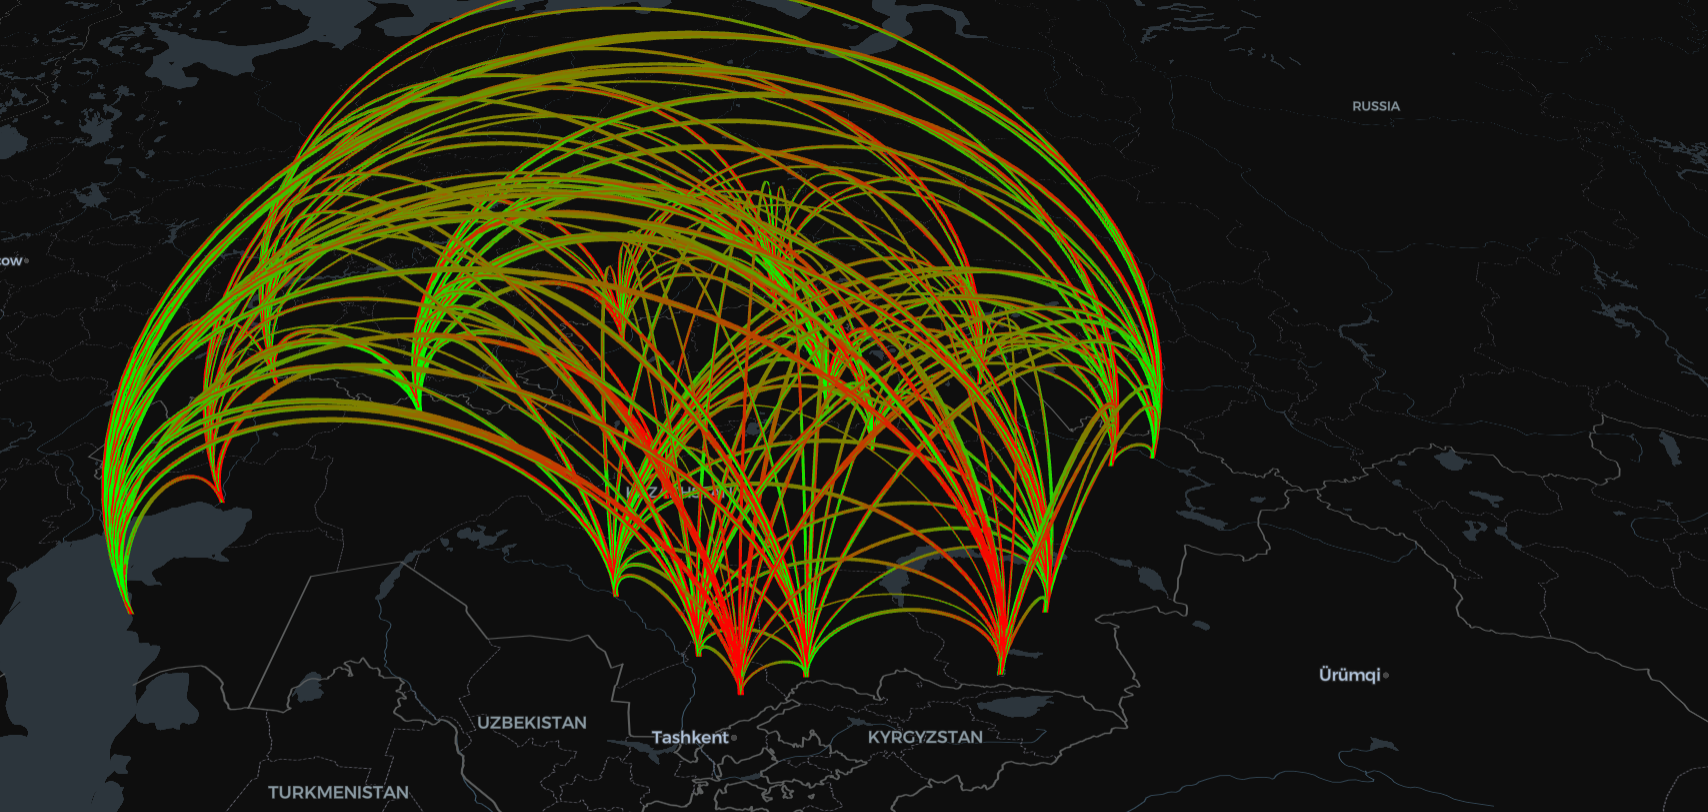

In [111]:
from IPython.display import Image

# Display an image
Image(filename="C:\\Users\\Asus\\OneDrive\\Изображения\\Снимки экрана\\Снимок экрана 2024-12-16 021645.png")  # Replace with your image path


In [4]:
import pydeck as pdk
import json


In [10]:
# Загрузка нового GeoJSON с данными
with open('u7.json', 'r') as f:
    geojson_data = json.load(f)

# Центрируем карту на Алматинской области
view = pdk.ViewState(
    latitude=43.2389,  # Широта Алматы
    longitude=76.8897,  # Долгота Алматы
    pitch=50,
    zoom=7  # Увеличиваем зум для подробного просмотра
)

# Создаем слой GeoJsonLayer
geojson_layer = pdk.Layer(
    "GeoJsonLayer",
    data=geojson_data,
    opacity=0.8,
    stroked=False,
    filled=True,
    extruded=True,  # Высота районов
    wireframe=True,
    pickable=True,
    get_elevation="properties.total_population / 10",  # Высота зависит от населения
    get_fill_color="[properties.total_population / 500, 150, 200, 255]",  # Цвет пропорционален населению
    get_line_color=[255, 165, 0]
)


In [12]:
# Создаем объект карты
geojson_layer_map = pdk.Deck(
    layers=[geojson_layer],
    initial_view_state=view,
    map_style='road'
)

# Отображение карты в Jupyter и сохранение в HTML
geojson_layer_map.to_html('almaty_population_map.html')


In [119]:
from IPython.display import Image

# Display an image from a URL
Image(url="C:\\Users\\Asus\\OneDrive\\Изображения\\Снимки экрана\\Снимок экрана 2024-12-16 050308.png")  # Replace with your image URL
